Week 8
======



In [1]:
from py5canvas import *

## Image loading reading and writing



In [2]:
from importlib import reload
from py5canvas import canvas
reload(canvas)

<module 'py5canvas.canvas' from '/Users/colormotor/develop/teaching/py5canvas/py5canvas/canvas.py'>

So far, we have been specifying images on a &ldquo;canvas&rdquo; using vector graphics primitives such as lines, circles, polygons and curves. To display these shapes on a screen they eventually need to be transformed into **a grid of pixels forming an an image**, a process that is known as &ldquo;rasterization&rdquo;. This term comes from [&ldquo;raster&rdquo;]([https://www.merriam-webster.com/dictionary/raster](https://www.merriam-webster.com/dictionary/raster)), referring to how images used to be displayed in cathode-ray tube television, by scanning the screen with an electron beam from side to side and from top to bottom. A &ldquo;rasterizer&rdquo; is a system that takes a representation of a shape in terms of its parameters (e.g. a circle with a center and a radius) and determines how to color pixels on a grid to approximate the appearance of the shape.

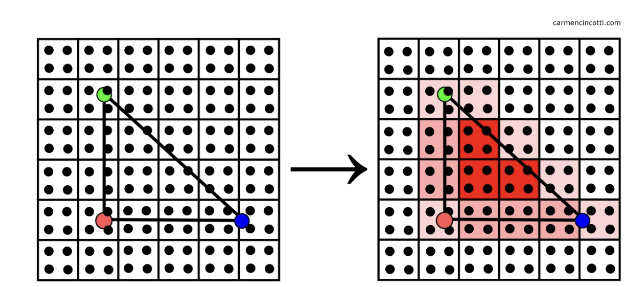

We can see the pixels clearly if we create a very small canvas and add a parameter to our usual `show` function, specifying that we want to blow up an image to given size and that we want to avoid smoothing out the image when scaling it up:



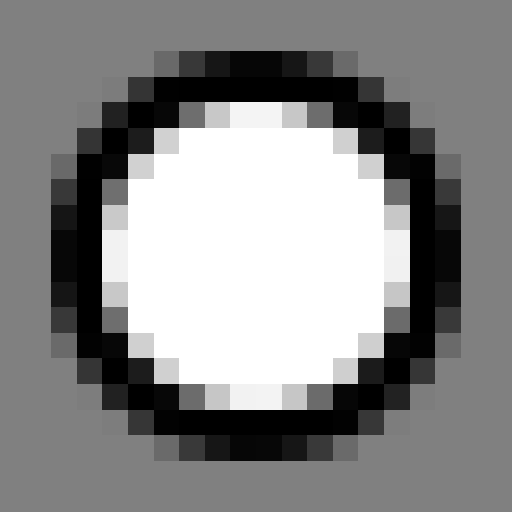

In [3]:
create_canvas(20, 20)
circle(center, 7)
stroke(0)
fill(255)
show(size=(512, 512), resample='nearest')

Looking at the image you can see that that black outline we specified, is actually a mix of different shades of grey and black pixels. This is done behind the scenes to give the illusion of smooth curves/lines rather than a collection of blocks, a process known as [anti-aliasing](https://en.wikipedia.org/wiki/Anti-aliasing). On the contrary, [aliasing](https://en.wikipedia.org/wiki/Aliasing) is the effect that occurs when the number of samples (pixels in this case) is insufficient to appropriately approximate a signal (an image in this case). Aliasing and anti-aliasing are important topics in the field of [digital signal processing (DSP)](https://en.wikipedia.org/wiki/Digital_signal_processing) and generally apply to the digital approximation of signals, including audio as well as images.



## Loading images



Now to one basic step in working with images. How do we load one? The simplest way in Py5canvas is to use the `load_image` function, specifying the path to where the image is located:



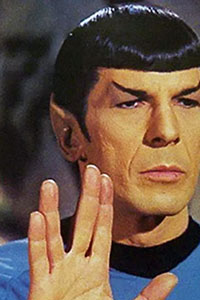

In [4]:
create_canvas(200, 300)
img = load_image('spock.jpg')
image(img)
show()

Here, we loaded an image that is larger than the canvas and displayed it using the `image` function. We can display the the size of an image loaded this way by using the `size` parameter:



In [5]:
print(img.size)

(256, 352)


To resize it or place it at a given location, we can add parameters to the `image` call, specifying the top left corner coordinates, the width and the height:



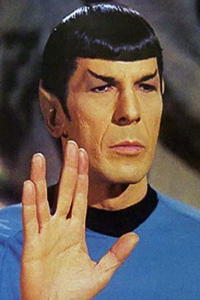

In [8]:
create_canvas(200, 300)
img = load_image('spock.jpg')
image(img, 0, 0, width, height)
show()

However you can see that the image is stretched. This happens because the aspect ratio of the image, i.e. the ratio between width and height, is different from the aspect ratio of the canvas. We can resize the image without stretching by using the `width` and `height` properties of the image to compute this ratio, e.g.



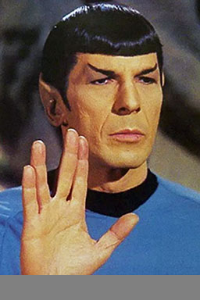

In [9]:
create_canvas(200, 300)
img = load_image('spock.jpg')
aspect = img.width/img.height
image(img, 0, 0, width, width/aspect)
show()

## Pillow, the image library



Now to where these `size`, `width`, `height` properties come from. In Python there are many ways to load images, one of the simplest being driven by an external library called [Pillow](https://pillow.readthedocs.io/en/stable/) with module name `PIL`. We will call it "PIL" from now on. This high level library is fast, widely used and offers an interface to interact with images that is quite similar to P5js and Processing. As a result, it is used by default in Py5canvas when loading an image with `load_image`. The downside of using Pyllow is that converting image manipulation code from P5js or Processing may require some modifications. The upside is that the library itself is a bit of a swiss-army knife of image processing and offers many functionalities that may not be available in the JavaScript and Java counterparts. Think of it as a small Photoshop driven by code:)



### Internals



Internally `load_image` hides the following code, which you may find youself using in future occasions:



In [10]:
from PIL import Image
img = Image.open('spock.jpg')

Notebooks are built so you can display an image like a variable, so simply writing the variable containing the image will display it below a code cell:



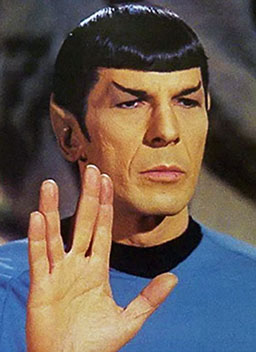

In [11]:
img

We will use this "trick" to reduce the amount of code when demo-ing the lib.


### Functionalities



When loading an image using `load_image` (or `Image.open` as above) we get a Python object that exposes a number of useful functionalities. Because we can directly display a PIL image in the notebook, the following cells will omit the canvas creation, but note that these functions **will return a new image and not display it in an interactive sketch**. You will have to pass them to the `image` function istead.



#### Image size



One useful function is resizing an image, you can do this with the `.resize` method taking a tuple with the new size as an argument (note the parentheses):



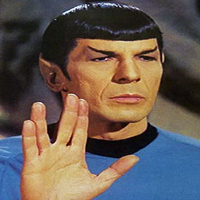

In [13]:
img.resize((200, 200))

You can also crop an image by specifying `(x, y, width, height)` in a tuple:



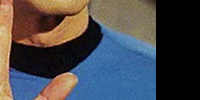

In [14]:
img.crop((100, 200, 300, 300))

As an example, we can use this to crop function to transform the image above into a square image:



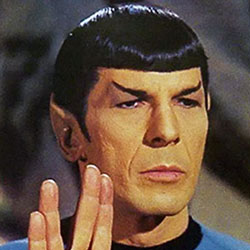

In [15]:
img.crop((0, 0, 250, 250))

#### Color



You can convert an image to grayscale (or from grayscale to color) by using the `convert` method, and specifying the string of the color format, e.g.



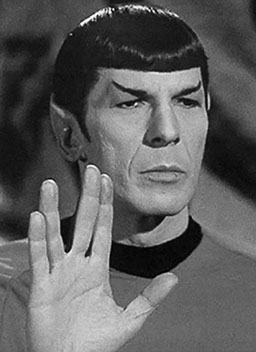

In [16]:
img.convert('L')

Will convert the image to grayscale, with `'L'` (or `"L"`) standing for &ldquo;luminance&rdquo;.

You may want to &ldquo;quantize&rdquo; the color values in an image:



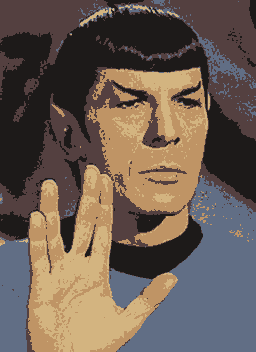

In [17]:
img.quantize(5)

### Filtering/Enhancing



PIL has a very powerful set of high level filtering functions, accessible through the `PIL.ImageFilter` and `PIL.ImageEnhance` modules, which you need to import in your code. You than can apply a filter to the image you created or loaded by using the `filter` and `enhance` methods of the image. You can refer to these on the [ImageFilter](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html) and [ImageEnhance](https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html) official documentations.

As an example, you can apply a [Gaussian blur](https://en.wikipedia.org/wiki/Gaussian_blur) as follows:



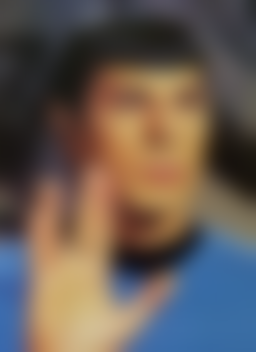

In [18]:
from PIL import ImageFilter
img.filter(ImageFilter.GaussianBlur(10))

with the parameter being the radius of the blur.

As another example, you can apply a median filter (can be slow):



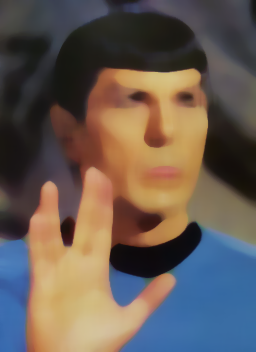

In [19]:
img.filter(ImageFilter.MedianFilter(15))

To apply brightness, contrast and saturation you can use the `ImageEnhance` module, which has a bit of a less intuitive syntax. You must import the module and then create an &ldquo;enhancement object&rdquo; that exposes an `enhance` method, which you can call to get the modified image, e.g. for Brightness



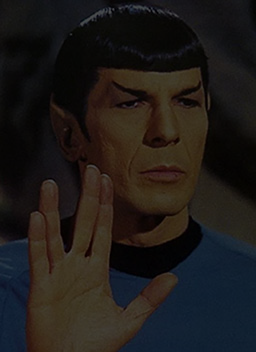

In [20]:
from PIL import ImageEnhance
ImageEnhance.Brightness(img).enhance(0.3)

For contrast:



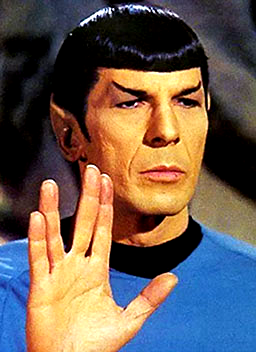

In [21]:
ImageEnhance.Contrast(img).enhance(1.5)

Ans saturation (using the `Color` class):



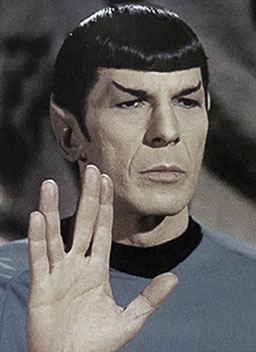

In [22]:
ImageEnhance.Color(img).enhance(0.25)

The `ImageEnhance` interface can be a bit awkard to use, so you could create a function that applies brightness and contrast to an image (similarly to Photoshop):



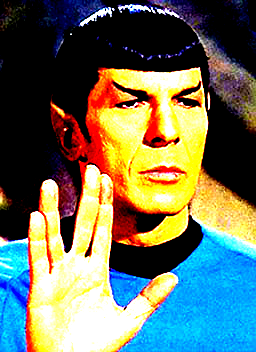

In [23]:
def brightness_contrast(img, brightness, contrast):
    img = ImageEnhance.Brightness(img).enhance(brightness)
    return ImageEnhance.Contrast(img).enhance(contrast)

brightness_contrast(img, 1.1, 4.5)

### Other operations



Among many other submodules, PIL contains the `ImageOps` module with official documentation [here](https://pillow.readthedocs.io/en/stable/reference/ImageOps.html). It provides functionalities such as &ldquo;mirroring&rdquo;, which can come especially useful when working with video input.

To flip an image horizontally use the `ImageOps.mirror` function:



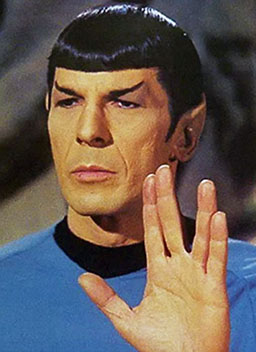

In [24]:
from PIL import ImageOps

ImageOps.mirror(img)

To flip vertically use `ImageOps.flip`:



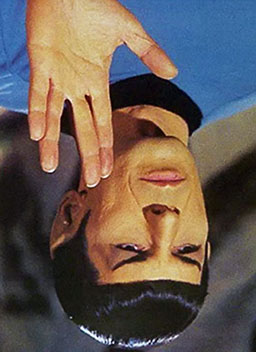

In [25]:
ImageOps.flip(img)

To invert the colors of an image use `ImageOps.invert`:



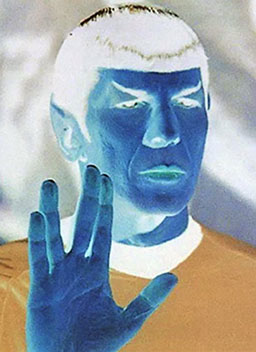

In [26]:
ImageOps.invert(img)

## Reading the pixels of an image



Images are composed of &ldquo;grid&rdquo; of pixels. You can think of it as a 2d array, where the height of the image is the number of rows and the width the number of columns. Each entry in this array represents the color of a pixel, so for a grayscale image we have something like this:



In [27]:
gray_img = img.convert('L')
gray_img.getpixel((100,5))

81

By experimenting with the x, y coordinates of each pixel you can see that pixel brightness values range between 0 and 255, alike the default setup in Py5Canvas. 
The reason for this is that by default, pixels are stored with 8 bits of binary information, allowing a minimum value of 0 (00000000 in binary) and a maximum of 255 (11111111 in binary).

If you try to write a large number for a coordinate of a pixel (say 1000) you will see that you get an error:

In [28]:
gray_img.getpixel((1000,0))

IndexError: image index out of range

This is because you need the x coordinates to lie in the range between 0 and the width of the image minus one, and similarly the y coordinates must lie in the range between 0 and the height minus one:



In [29]:
gray_img.getpixel((gray_img.width-1, gray_img.height-1))

96

For colored images, we usually have 3 values per pixel, indicating the intensity of the red, green and blue channels of an image:



In [30]:
img.getpixel((3,3))

(73, 69, 66)

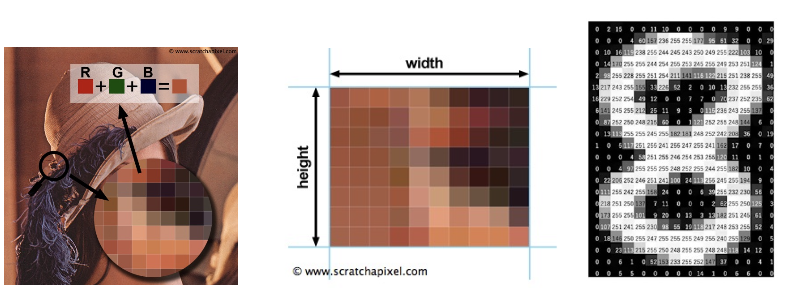


We can use the colors retrieved from a pixel of an image directly to set the color of a shape in Py5Canvas. For example we could do a pixelated version of an image by lowering the resolution of the image (a process called [[[https://en.wikipedia.org/wiki/Downsampling_(signal_processing)](https://en.wikipedia.org/wiki/Downsampling_(signal_processing))][&ldquo;downsampling&rdquo;]) to a small number of pixels and then drawing a re-scaled square for each low resultion pixel:



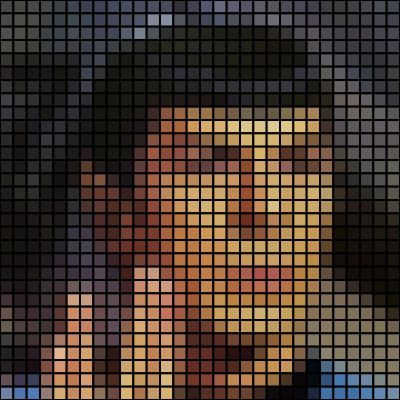

In [31]:
create_canvas(400, 400)
# Load and crop to a square image
img = load_image('spock.jpg').crop((0, 0, 250, 250))
img = img.resize((30,30))
spacing = width / img.width
for y in range(img.height):
    for x in range(img.width): # x
        fill(img.getpixel((x, y)))
        rect(x*spacing, y*spacing, spacing, spacing)
show()

Note that we used an outer loop over height and a inner loop over width. This is somewhat a convention, since pixels are typically stored &ldquo;row by row&rdquo; in memory. 

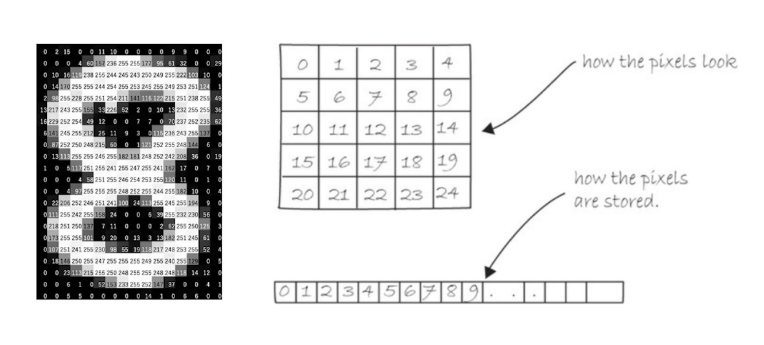

This becomes more significant if/when you start doing lower level operations on image pixels (in Python and beyond). For the code above we use `x` and `y` for clarity, but it is common to also use `i` and `j` as conventional with loops.

We can modify this code with transformations, to potentially draw more complex shapes for each pixel:



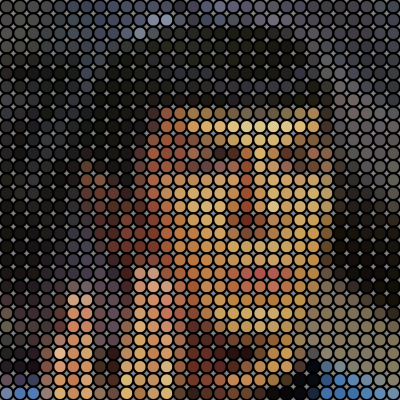

In [32]:
create_canvas(400, 400)
# Load and crop to a square image
img = load_image('spock.jpg').crop((0, 0, 250, 250))
img = img.resize((30,30))
scale_factor = width/img.width
stroke_weight(2/scale_factor)
scale(scale_factor)
for y in range(img.height):
    for x in range(img.width): #
        push()
        fill(img.getpixel((x, y)))
        translate(x+0.5, y+0.5)
        circle(0, 0, 0.5)
        #rect(x, y, 1, 1)
        pop()
show()

This code has few subtleties worth noticing:

-   The code applies a transformation that scales the whole drawing by a `scale_factor` that increases the size of the drawing based on the ratio between the canvas width (`width`) and the downsampled image width (`img.width`).
-   This means that a distance of `1` will become a distance of `width/img.width` pixels.
-   This operation also scales the stroke weight, so to get a line width of two pixels we need to take this into account by doing `stroke_weight(2/scale_factor)`.
-   For each pixel we read we work in a scaled coordinate system. The center of each grid cell in this scaled coordinate system is `0.5, 0.5`, so we add these values when translating to a pixel.

If we convert the image to grayscale, we can use the brigthness values to create a [&ldquo;half-toning&rdquo;](https://en.wikipedia.org/wiki/Halftone) effect that approximate the image with shapes of different sizes:



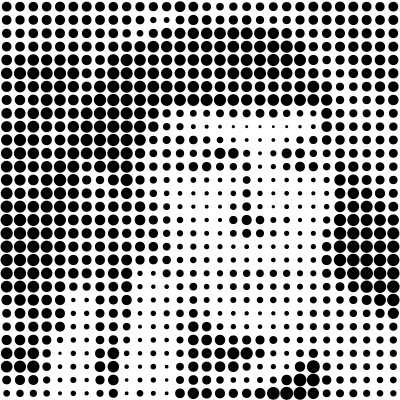

In [33]:
create_canvas(400, 400)
background(255)
fill(0)
no_stroke()

img = load_image('spock.jpg').crop((0, 0, 250, 250))
img = img.resize((30,30)).convert('L')
spacing = width/img.height
for y in range(img.height):
    for x in range(img.width): #
        push()
        v = img.getpixel((x,y)) # In range 0 - 255
        radius = remap(v, (0, 255), (spacing*0.5, 0.0))
        translate(x*spacing+spacing/2, y*spacing+spacing/2)
        circle(0, 0, radius)
        #rect(x, y, 1, 1)
        pop()
show()

Here we go back to manually calculating the spacing instead of using a global scaling transformation.

We can use a similar procedure to create [&ldquo;ASCII art&rdquo;](https://www.asciiart.eu), by creating a list of characters with increasing (or decreasing) brigthness depending on wether we draw dark on light, or light on dark and then using the pixel brigthness value to index into this list:



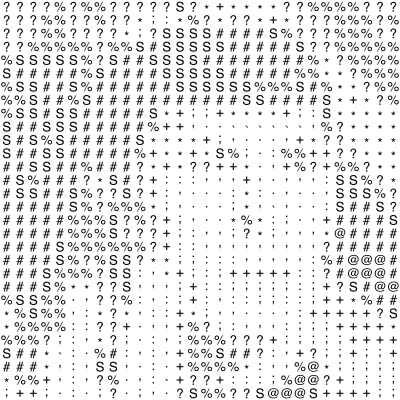

In [34]:
create_canvas(400, 400)
background(255)
fill(0)
no_stroke()

img = load_image('spock.jpg').crop((0, 0, 250, 250))
img = img.resize((30,30)).convert('L')
spacing = width/img.height

ascii_brightness = ["@", "#", "S", "%", "?", "*", "+", ";", ":", ",", ".", "`", "'", "-", "_", " "]

text_size(spacing)
text_align('center', 'center')
for y in range(img.height):
    for x in range(img.width): #
        push()
        v = img.getpixel((x,y)) # In range 0 - 255
        # We need to convert to an integer to properly index
        index = int(remap(v, 0, 255, 0, len(ascii_brightness)-1))
        translate(x*spacing+spacing/2, y*spacing+spacing/2)
        text(ascii_brightness[index], 0, 0)
        #rect(x, y, 1, 1)
        pop()
show()

> **LAB WORK:** Create a function that draws and experiment with drawing more complex shapes for each pixel. Keep in mind that for each pixel in the code above we are working in a scaled coordinate system, where the size of a grid cell is `1`.\* Lower level image maniuplation with NumPy arrays
PIL give high level functionalities to manipulate images, but sometimes it is useful/necessary to operate on pixels at a lower level or to perform more complex procedures on images such as [computer vision](https://en.wikipedia.org/wiki/Computer_vision).

## Video input
You can easily add video input (with a file or a camera conected to your computer, using a Py5canvas object called `VideoInput` ). This is a basic sketch that uses it to display the camera feed:
```Python
from py5canvas import *
from PIL import ImageOps

w, h = 400, 400
vin = VideoInput(size=(w, h))

def setup():
    create_canvas(w, h)

def draw():
    img = vin.read()
    # Uncomment to mirror
    # img = ImageOps.mirror(img)
    image(vin.read())

run()
```

This creates a video input stream called `vin` with a specified size. Each frame we read a frame of the input using `vin.read()`, which by default gives us a PIL Image that we can use.
To read a video file, simply replace the video input creation line with `vin = VideoInput('fingers.mov', size=(w, h))`. The first parameter of `VideoInput` is the path to a video file.

> **LAB WORK:** Experiment by integrating the examples above in the interactive video input example sketches.

## Low level images in numpy
Images are essentially collections of pixels and pixels are represented by numbers, so the &ldquo;natural&rdquo; way to operate on these numbers is to use NumPy arrays. A PIL image can be converted to a numpy array, by passing it as an argument to the `np.array` constructor fuction. It is then possible to display it as usual in a canvas



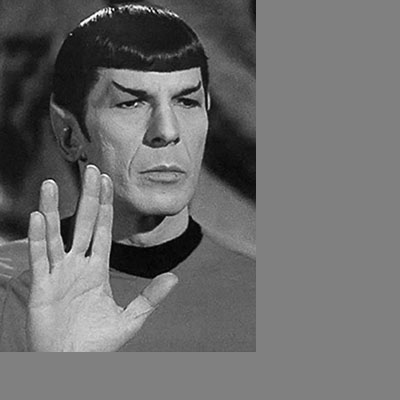

In [35]:
img = load_image('spock.jpg').convert('L')
create_canvas(400, 400)
ary = np.array(img)
image(ary) #np.array(img.convert('L')))
show()

Here we converted the image to grayscale, so if we print the array shape we see that it is:



In [36]:
ary.shape

(352, 256)

that is an array with 352 rows and 256 columns. The `shape` property is a sequence of numbers with the height (the number of rows) being `shape[0]` and
the width (the number of columns) being `shape[1]`. As previously mentioned, this a bit confusing but is due to how images are stored in memory, row by row, which is reflects in the &ldquo;shape&rdquo; of the array.

We can print part of these values using [&ldquo;slicing&rdquo;](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp):



In [37]:
ary[:5, :5]

array([[57, 55, 65, 75, 72],
       [60, 59, 66, 73, 71],
       [59, 63, 66, 70, 72],
       [57, 63, 66, 70, 75],
       [58, 65, 67, 71, 77]], dtype=uint8)

> **NOTE** as a reminder slicing an array follows the syntax `[start:end]` or for 2d arrays `[start_row:end_row, start_col:end_col]`. Omitting any of the starting or ending indices means starting from the beginning or going till the end of the array, respectively.We can see that when outputing the array from a cell, the output shows a property `dtype`. This is a property that indicates the datatype of each array element and it becomes more important when doing low level operations on images. The type `np.uint8` (with `np` not shown when you print) means that each element of the array is an unsigned (always zero or positive) 8 bit integer. As previously mentioned this means that each array element only can contain a value between 0 and 255.

Py5Canvas also accepts images expressed with colors in the range between 0 and 1. We can convert the array to this format by dividing it by 255:



In [38]:
ary01 = ary/255
ary01[:5, :5]

array([[0.22352941, 0.21568627, 0.25490196, 0.29411765, 0.28235294],
       [0.23529412, 0.23137255, 0.25882353, 0.28627451, 0.27843137],
       [0.23137255, 0.24705882, 0.25882353, 0.2745098 , 0.28235294],
       [0.22352941, 0.24705882, 0.25882353, 0.2745098 , 0.29411765],
       [0.22745098, 0.25490196, 0.2627451 , 0.27843137, 0.30196078]])

In which case the `dtype` property of the array becomes:



In [39]:
ary01.dtype

dtype('float64')

Meaning it can contain floating point numbers (numbers like `10.123223` as opposed to `10`) with 64 bits of precision. This precision can be useful or even necessary when doing certain computations on array.

Now, how can using NumPy arrays be useful when dealing with images? The main advantages are flexibility and speed!
We can treat whole images as &ldquo;numbers&rdquo; and perform mathematical operations on them.
One practical example to demonstrate this is [gamma correction](https://en.wikipedia.org/wiki/Gamma_correction) which adjusts the brightness of an image by using a power:



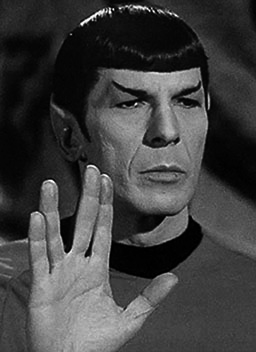

In [40]:
img = load_image('spock.jpg').convert('L')
img = np.array(img)/255
gamma = 1.5
img = img**gamma
create_canvas(img.shape[1], img.shape[0])
image(img)
show()

Here we use the operator `**` to raise each value in the image array to the power `gamma`. In this case it is particularly useful to have the image in the range 0 to 1, since for any number $n$, $0^n=0$ and $1^n=1$.

Another less practical example could be treating all the intensity in an image as an input to a sinewave, e.g.



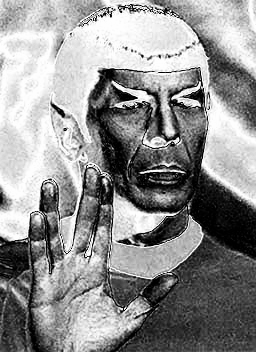

In [41]:
img = load_image('spock.jpg').convert('L')
img = np.array(img)/255
simg = np.sin(img*np.pi*3)
simg = remap(simg, -1, 1, 0, 1)
create_canvas(img.shape[1], img.shape[0])
image(simg)
show()

Note that we can use the `remap` function also on arrays, since internally it is written using NumPy. It simply applies the re-mapping to all the element in the array.



### Looping over images in NumPy



We can access the pixels in an image represented as an array with a similar procedure to what we did earlier, keeping in mind that the width is the property `shape[1]` and height is the property `shape[0]`:



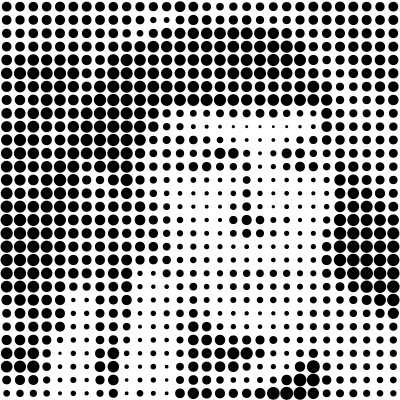

In [42]:
create_canvas(400, 400)
background(255)
fill(0)
no_stroke()

img = load_image('spock.jpg').crop((0, 0, 250, 250))
# Resize and convert to an array in the 0 to 1 range
img = np.array(img.resize((30,30)).convert('L'))/255

spacing = width/img.shape[0]

for y in range(img.shape[0]):
    for x in range(img.shape[1]): #
        push()
        v = img[y, x]
        radius = remap(v, (0, 1), (spacing*0.5, 0.0))
        translate(x*spacing+spacing/2, y*spacing+spacing/2)
        circle(0, 0, radius)
        #rect(x, y, 1, 1)
        pop()
show()

The array represetation is useful because we can now create custom operations on the image that are efficient, for instance in one of today&rsquo;s interactive examples, we will interpolate between frames grabbed from the computer camera to smoothly animate these circles, or other shapes.



In [ ]:
> **LAB WORK:** Look at the video_input_shapes_numpy example. Experiment with different shapes and interpolation values.

### Color images with numpy



We can also represent color images with NumPy with a similar syntax:



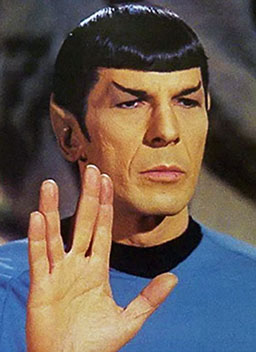

In [43]:
im = load_image('spock.jpg')
ary = np.array(im)
create_canvas(ary.shape[1], ary.shape[0])
image(ary)
show()

Again we can print the array shape but this time we see an additional number:



In [44]:
ary.shape

(352, 256, 3)

Indicating that we now have a 3d array, where the last dimension is the number of channels (R, G, B). Think of it as three 2d slices, with each slice being one channel. Indeed we can visulize one channel, using the &ldquo;slicing&rdquo; syntax, where `ary[:,:,0]` is the red channel and the `:` stands for &ldquo;all the elements in a given dimension&rdquo;:



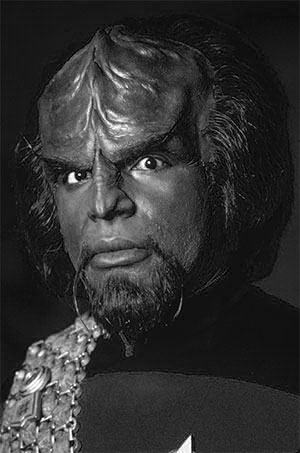

In [45]:
im = load_image('worf.jpg')
ary = np.array(im)
create_canvas(ary.shape[1], ary.shape[0])
image(ary[:,:,2])
show()

You can apply operations to a single channel for instance to decrease the amount of blue, but in this case it is better to convert the image to the 0 to 1 range. Otherwise, we are likely to get a different datatype for one channel, which is not allowed:



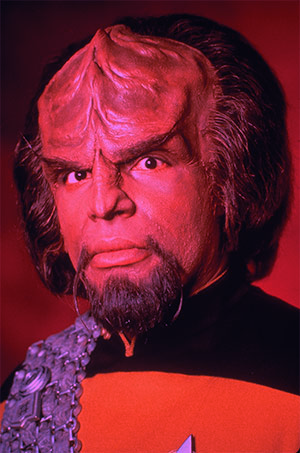

In [46]:
ary = np.array(im)/255
ary[:,:,1] *= 0.5
create_canvas(ary.shape[1], ary.shape[0])
image(ary)
show()

#### Blending two images using NumPy



Now, staying in the Star Trek theme, let&rsquo;s blend an image of Spock and an image of Worf. This will require making sure that both images have the same size. There are different ways to do this without distortion, one being using PIL:

-   Compute the aspect ratio (height/width) of one image
-   Resize it to the desired with and height its width times the aspect ratio
-   Crop both to have the minimum height of the two images



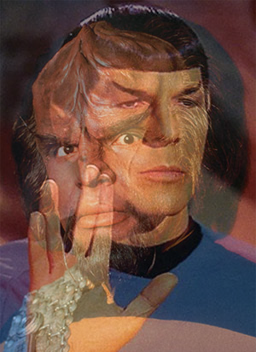

In [47]:
im1 = load_image('spock.jpg')
im2 = load_image('worf.jpg')

# The procedure described above
w = im1.width
aspect_ratio = im2.height/im2.width
im2 = im2.resize((w, int(w*aspect_ratio)))
h = min(im1.height, im2.height)
im1 = im1.crop((0, 0, w, h))
im2 = im2.crop((0, 0, w, h))

# Convert to numpy (0 to 1 range)
im1 = np.array(im1)/255
im2 = np.array(im2)/255

create_canvas(w, h)
image(lerp(im1, im2, 0.5))
show()

Notice that again we can use a Py5Canvas on arrays as we used it on numbers, in this case `lerp`. The function will work as long as the arrays have the same size, applying its operation on each array element.
Note also that you can avoid all the resizing/cropping code by simply loading images that are already the same size (e.g. resized in Photoshop)



### Reading video in an interactive sketch



### Procedural images with Numpy



A more advanced example allows us to create a linear gradient by using `linspace` with inputs that are not numbers but arrays. The result is a 2d array. An additional named parameter `axis` determines if we interpolate along the rows (`axis=0`, a vertical gradient) or along the columns (`axis=1`, a horizontal gradient)



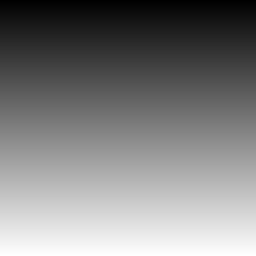

In [48]:
w, h = 256, 256
im = np.linspace(np.zeros(w), np.ones(w), h, axis=0)
create_canvas(w, h)
image(im)
show()

We can combine two gradients by multiplying them



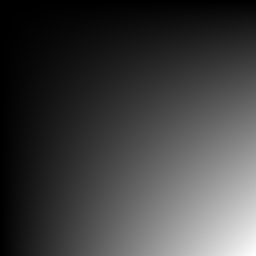

In [49]:
w, h = 256, 256
gradient_v = np.linspace(np.zeros(w), np.ones(w), h, axis=0)
gradient_h = np.linspace(np.zeros(w), np.ones(w), h, axis=1)
create_canvas(w, h)
image(gradient_v * gradient_h)
show()

And create patterns by applying math operations to array values



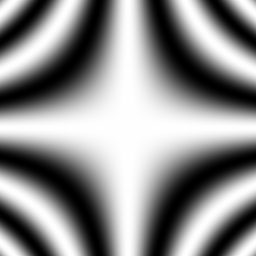

In [50]:
def normalize_image(im):
    return (im - im.min())/(im.max() - im.min())

w, h = 256, 256
gradient_v = np.linspace(-np.ones(w), np.ones(w), h, axis=0)
gradient_h = np.linspace(-np.ones(w), np.ones(w), h, axis=1)

im = normalize_image(np.cos(gradient_v * gradient_h * 14))
create_canvas(w, h)
image(im)
show()

Here we defined a function `normalize_image` that takes an image expressed as a NumPy array and &ldquo;normalizes&rdquo; it so it lies in the range 0 to 1. It may come useful if you want to do operations on images where the output range is not easy to predict.



### From here



With these tools in hand, you should be able to explore many other imaging topics including computer vision (CV) methods. One exteral library that comes already installed with Py5Canvas is [OpenCV](https://opencv.org), It is one of the most widely used CV libraries, works using NumPy arrays and can be imported using the `cv2` module:



In [51]:
import cv2

While we don&rsquo;t have enough time to cover it in sufficient depth, you can read a step by step tutorial [here](https://www.geeksforgeeks.org/opencv-python-tutorial/).




<style>.csl-entry{text-indent: -1.5em; margin-left: 1.5em;}</style><div class="csl-bib-body">
</div>

